In [12]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
import arviz as az
from theano import tensor as tt

In [10]:
az.style.use('arviz-darkgrid')

## Mixture Models

### Finite Mixtures Model

In order to fit a finite mixture model, we need to provide a value of $K$ , either because we really know the correct value beforehand, or because we have some educated guess.

$$p(y|θ) = \sum_{i=1}^K w_i p_i (y|θ_i)$$ 

Here, $w_i$ is the weight of each component (or class). It can be interpret as the probability of the componenet $i$ thus its values are restricted to the interval $[0, 1]$ and $\sum_{i}^k = 1$. The *component* $p_{i}(y|\theta_{i})$ can be anything from simple distributions, such as a Gausian or a Poisson, to more complex objects, such as hierachical models or netwoks. For finite mixture model, $K <_{\approx} 20$

([], [])

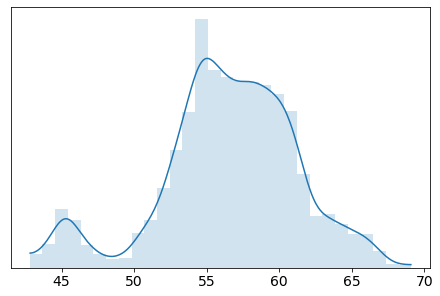

In [2]:
cs = pd.read_csv("C:/Users/bomyr/Downloads/Data/chemical_shifts_theo_exp.csv")
cs_exp = cs['exp']
az.plot_kde(cs_exp)
plt.hist(cs_exp, density=True, bins=30, alpha=0.2)
plt.yticks([])

The generalization of the Bernoulli distribution to $K$ -outcomes is the **categorical distribution** and the generalization of the beta distribution is the **Dirichlet distribution**.

### The categorical distribution

It is the most general discrete distribution and is **parametrized** using a parameter specifying the probabilities of each possible outcome.

###  The Dirichlet distribution

In [3]:
clusters = 2
with pm.Model() as model_mg:
    p = pm.Dirichlet('p', a= np.ones(clusters))
    means = pm.Normal('means', mu = cs_exp.mean(), sd=10, shape=clusters)
    sd = pm.HalfNormal('sd', sd=10)
    y = pm.NormalMixture('y', w=p, mu=means, sd=sd, observed=cs_exp)
    trace_mg = pm.sample(random_seed=123)

C:\Users\bomyr\AppData\Local\Temp\ipykernel_29020\2907938674.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_mg = pm.sample(random_seed=123)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, means, p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 53 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


C:\Users\bomyr\miniconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'means'}>,
        <AxesSubplot:title={'center':'means'}>],
       [<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

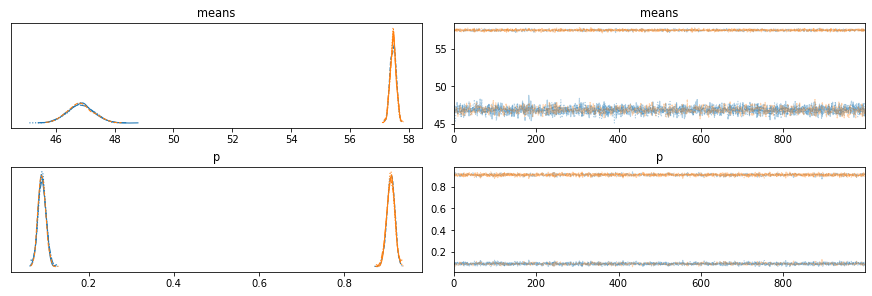

In [4]:
varnames = ['means', 'p']
az.plot_trace(trace_mg, varnames)

In [5]:
az.summary(trace_mg, varnames)

C:\Users\bomyr\miniconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
means[0],49.500,4.615,46.183,57.635,2.291,1.754,7.0,29.0,1.53
means[1],54.807,4.608,46.489,57.686,2.292,1.755,7.0,27.0,1.53
p[0],0.295,0.355,0.075,0.920,0.177,0.135,7.0,28.0,1.53
p[1],0.705,0.355,0.080,0.925,0.177,0.135,7.0,28.0,1.53


In [13]:
clusters = 2
with pm.Model() as model_mgp:
    p = pm.Dirichlet('p', a= np.ones(clusters))
    means = pm.Normal('means', mu = np.array([.9, 1])*cs_exp.mean(), sd=10, shape=clusters)
    sd = pm.HalfNormal('sd', sd=10)
    order_names = pm.Potential('order_means', tt.switch(means[1]-means[0]<0, -np.inf, 0))
    y = pm.NormalMixture('y', w=p, mu=means, sd=sd, observed=cs_exp)
    trace_mgp = pm.sample(1000, random_seed=123)

C:\Users\bomyr\AppData\Local\Temp\ipykernel_29020\251666192.py:8: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_mgp = pm.sample(1000, random_seed=123)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, means, p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 55 seconds.


C:\Users\bomyr\miniconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'means'}>,
        <AxesSubplot:title={'center':'means'}>],
       [<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

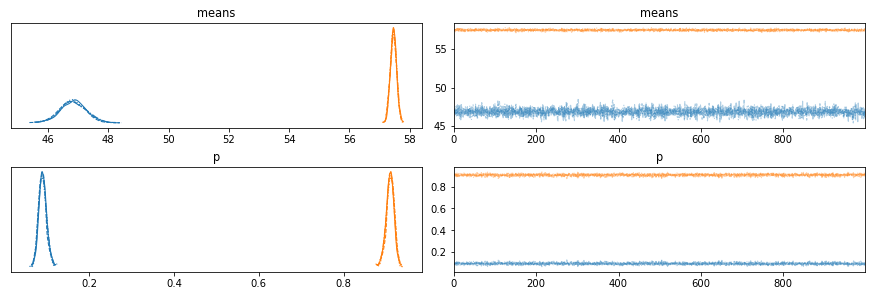

In [14]:
varnames = ['means', 'p']
az.plot_trace(trace_mgp, varnames)

In [16]:
az.summary(trace_mgp, varnames)

C:\Users\bomyr\miniconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
means[0],46.833,0.431,46.002,47.644,0.007,0.005,3503.0,3022.0,1.0
means[1],57.464,0.101,57.264,57.642,0.002,0.001,4051.0,3230.0,1.0
p[0],0.090,0.009,0.074,0.109,0.000,0.000,2906.0,3129.0,1.0
p[1],0.910,0.009,0.891,0.926,0.000,0.000,2906.0,3129.0,1.0
